# Métodos para pronósticos

Revisaremos algunos métodos utilizados para pronósticos.
Utilizaremos la serie a continución para ilustrar los ejemplos.

In [15]:
series = [3,10,12,13,12,10,12]

## Metodo ingenuo (Naivi)
Este es el método de pronóstico más primitivo. La premisa del método ingenuo es que el punto esperado es igual al último punto observado:

\\(\widehat{y}_{t+1} = y_t \\)

Con este método, pronosticamos que el siguiente punto será 12

## Promedio simple
Es el producto aritmético de todos los puntos observados previamente. 

\\( \widehat{y}_{t+1} = \frac{1}{n} \sum_{i=1}^{n} y_{i} \\)


In [16]:
def promedio (series):
    return float(sum(series)/len(series))

In [17]:
promedio(series)

10.285714285714286

Como método de pronóstico, en realidad hay situaciones en las que es perfecto. Por ejemplo, su calificación final de la escuela puede ser el promedio de todas las calificaciones anteriores.

## Promedio móvil
Una mejora sobre el promedio simple es el promedio de \\( n \\)  últimos puntos.

In [18]:
def promedio_movil(series,n):
    return(promedio(series[-n:]))

In [19]:
promedio_movil(series,3)

11.333333333333334

Un promedio móvil puede ser bastante efectivo, especialmente si elige el valor correcto de \\( n \\) para la serie. Los analistas de acciones lo adoran.

Podemos unificarel en un  solo programa el promedio y el promedio móvil

In [20]:
def promedio(series,n=None):
    if n is None:
        return promedio(series, len(series))
    return float(sum(series[-n:]))/n

In [21]:
promedio(series,3)

11.333333333333334

In [22]:
promedio(series)

10.285714285714286

## Promedio móvil ponderado
Un promedio móvil ponderado es un promedio móvil en el que dentro de los valores de la ventana deslizante se les asignan diferentes pesos, por lo general, para que los puntos más recientes sean más importantes. En este [link](https://www.investopedia.com/ask/answers/071414/whats-difference-between-moving-average-and-weighted-moving-average.asp) se explica de mejor manera.

Recordemos que la suma de los pesos debe ser igual a 1 (100%). Te en cuenta que los valores más recientes de la serie deben ser multiplicados por los pesos con mayor valor, de esta forma se da más importancia (más peso) a estos valores.

In [23]:
def promedio_ponderado(series, pesos):
    resultado = 0.0
    pesos.reverse()
    for n in range(len(pesos)):
        resultado += series[-n-1]*pesos[n]
    return resultado

In [24]:
pesos = [0.1, 0.2, 0.3, 0.4] 
promedio_ponderado(series,pesos)

11.500000000000002

## Suviazado exponencial simple (ses)
En los promedios moviles ponderados las observaciones pasadas son ponderas igualitarimente. Es decir, los pesos asignados a las observaciones son los mismos y son iguales a 1/N.

Los esquemas de suavizado exponencial ponderan las observaciones pasadas utilizando pesos decrecientes exponencialmente. Aquí se deben determinar (o estimar) uno o más parámetros de suavizado y estas opciones determinan los pesos asignados a las observaciones. 
[Engineering Statistics Hanbook](https://www.itl.nist.gov/div898/handbook/pmc/section3/pmc324.htm)

\\(S_0 = Y_0 \\)

\\( S_t = \alpha\cdot  y_{t} + (1-\alpha)\cdot S_{t-1} \\) ; \\( 0<\alpha \leq 1 \\)

donde

\\(S_t\\): Valor suavisado

\\(y_{t-1}\\): Obsevación en el tiempo \\(t-1\\)

No hay \\(S_0\\); la serie suavizada comienza con la versión suavizada de la segunda observación.

\\(\alpha \\) pueder ser vista como el coeficiente (factor) de suavizado. 



In [91]:
# Programamos
import numpy as np

def ses(series,alfa):
    S=np.zeros(len(series))
    for t in range(len(series)):
        if t == 0:
            S[t]=series[t]
        else:
            S[t] = alfa*series[t] + (1 - alfa)*S[t-1]
    return S

In [80]:
series_suavizada = ses(series,0.9)
series_suavizada

array([ 3.      ,  9.3     , 11.73    , 12.873   , 12.0873  , 10.20873 ,
       11.820873])

### Graficamos

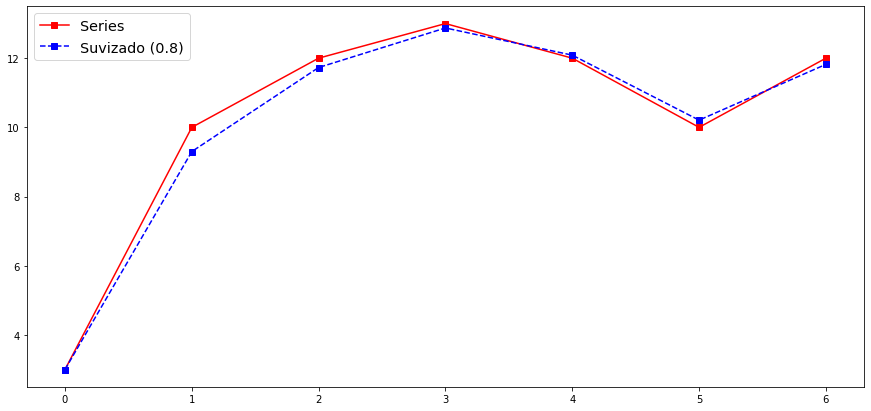

In [81]:
import matplotlib.pyplot as plt

import numpy as np

# Tamaño de la figura
plt.figure(figsize=(15,7))

# Preparamos los datos
t = np.arange(0., len(series), 1)
t_series = np.array(series)
t_suavizado = np.array(series_suavizada)

# Graficamos
#Estilos de lineas 	[ '-' | '--' | '-.' | ':' | 'steps' | ...]
plt.plot(t, t_series, 'rs-', t, t_suavizado, 'bs--') 
plt.legend(['Series','Suvizado (0.8)' ],loc='upper left',fontsize='x-large')
plt.show()

### Apliquemos a una serie real 
#### Precio del petroleo Brent

In [82]:
dir_brent = 'data/brent-monthly_csv.csv'

In [83]:
import pandas as pd
data_brent = pd.read_csv(dir_brent) 

In [84]:
col = data_brent.columns
col

Index(['Date', 'Price'], dtype='object')

In [85]:
precio = data_brent['Price']
fecha = data_brent['Date']

Aplicamos Suviazado Exponencial Simple

In [86]:
precio_suavizado_02 = ses(precio,0.2)
precio_suavizado_06 = ses(precio,0.6)
precio_suavizado_09 = ses(precio,0.9)

Graficamos

In [1]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=fecha, y=precio,
                    mode='lines',
                    name='Precio')) 
fig.add_trace(go.Scatter(x=fecha, y=precio_suavizado_02,
                    mode='lines',
                    name='Alfa=02')) 
fig.add_trace(go.Scatter(x=fecha, y=precio_suavizado_06,
                    mode='lines',
                    name='Alfa=06')) 
fig.add_trace(go.Scatter(x=fecha, y=precio_suavizado_09,
                    mode='lines',
                    name='Alfa=09')) 
fig.show()

NameError: name 'fecha' is not defined

Si \\(\alpha\\) es cercano a 0 se le da más pesos a las observaciones del pasado más lejos. Si \\(\alpha\\) es cercano a 1 se le da más peso a las observaciones más recientes. Para el caso extremo de \\(\alpha = 1\\) los 

#### Precio de las acciones de Apple

In [88]:
# Descargamos los datos
data_apple = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
data_apple.columns

Index(['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close',
       'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'],
      dtype='object')

In [89]:
# Aplicamos suavizado
precio_apple = data_apple['AAPL.High']
fecha_apple = data_apple['Date']
alfa = 0.2
precio_suavizado_apple = seu(precio_apple,alfa)

Graficamos el precio

In [90]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=fecha_apple, y=precio_apple,
                    mode='lines',
                    name='Precio'))
fig.add_trace(go.Scatter(x=fecha_apple, y=precio_suavizado_apple,
                    mode='lines',
                    name='Precio suavizado'))
fig.show()

## Forecasting utilizando Suavizado Exponencial Simple

https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc432.htm

La formula para esta ecuación es: 

\\( S_{t+1} = \alpha y_t + (1 - \alpha)S_t , 0< \alpha  \leq  1, t>0\\)

Esto puede ser escrito como:

\\(S_{t+1} = S_t + \alpha \epsilon_t\\) 

donde \\(\epsilon_t\\) es el error de pronóstico (real - pronóstico) para el periodo (tiempo) \\(t\\). En otras palabras, el nuevo pronóstico es el anterior más un ajuste por el error que ocurrió en el último pronóstico.

In [180]:
def ses_fc(series,alfa):
    S=np.zeros(len(series)+1)
    for t in range(len(series)):
        if t == 0:
            S[t]=series[t]
        else:
            S[t] = alfa*series[t] + (1 - alfa)*S[t-1]            
    S[t+1] = S[t] + alfa*(series[t]-S[t])
    return S

In [181]:
# Utilizaremos la producción en toneladas del petroleo de Arabia Saudi
precio_arabia = [445.36, 453.20, 454.41, 422.38, 456.04, 440.39, 425.19, 486.21, 500.43, 521.28,
                 508.95, 488.89, 509.87, 456.72, 473.82, 525.95, 549.83, 542.34] 
tiempo_arabia = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,
                 2011, 2012, 2012, 2013,2014]

In [187]:
series2=71,70,69,68,64,65,72,78,75,75,75,70

In [189]:
precio_arabia_pronostico = ses_fc(series2,0.1)
print(precio_arabia_pronostico)

[71.         70.9        70.71       70.439      69.7951     69.31559
 69.584031   70.4256279  70.88306511 71.2947586  71.66528274 71.49875447
 71.34887902]


### Suavizado exponencial doble

El suavizado exponencial simple no se destaca en el seguimiento de los datos cuando hay alguna tendecia.
Para mejorar esto Holt agregó una segunda ecuación con una segunda constante \\( \gamma \\) para la tendencia. 

\\( S_{t+1} = \alpha y_t + (1 - \alpha)(S_{t-1} + b_{t-1}), 0< \alpha \leq 1 \\)

\\( b_t = \gamma (S_t - S_{t-1}) + (1-\gamma)b_{t-1}, 0 < \gamma \leq 1 \\)

In [92]:
def sed(serie,alfa,gamma):
    S = np.zeros

SyntaxError: unexpected EOF while parsing (<ipython-input-92-c8c2ed1760e4>, line 1)

### Pronóstico utilizando el Suavizado exponencial doble
Dando como resultado una ecuación de pronóstico y dos ecuacionces de suavizado (una de nivel y otra de tendencia): 
- Ecuación de pronóstico:  
- Ecuación de nivel: 
- Ecuación de tendencia: 
